In [1]:
library(Seurat)
library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)
library(httr)
library(jsonlite)
library(hash)
library(readr)
library(purrr)
library(RColorBrewer)  # For color palettes
library(DESeq2)
library("scales")

library(ggpubr)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


hash-2.2.6.3 provided by Decision P

In [2]:
myeloid <- readRDS("../integrated_data/myeloid_cells_reint_newclassv2.rds")


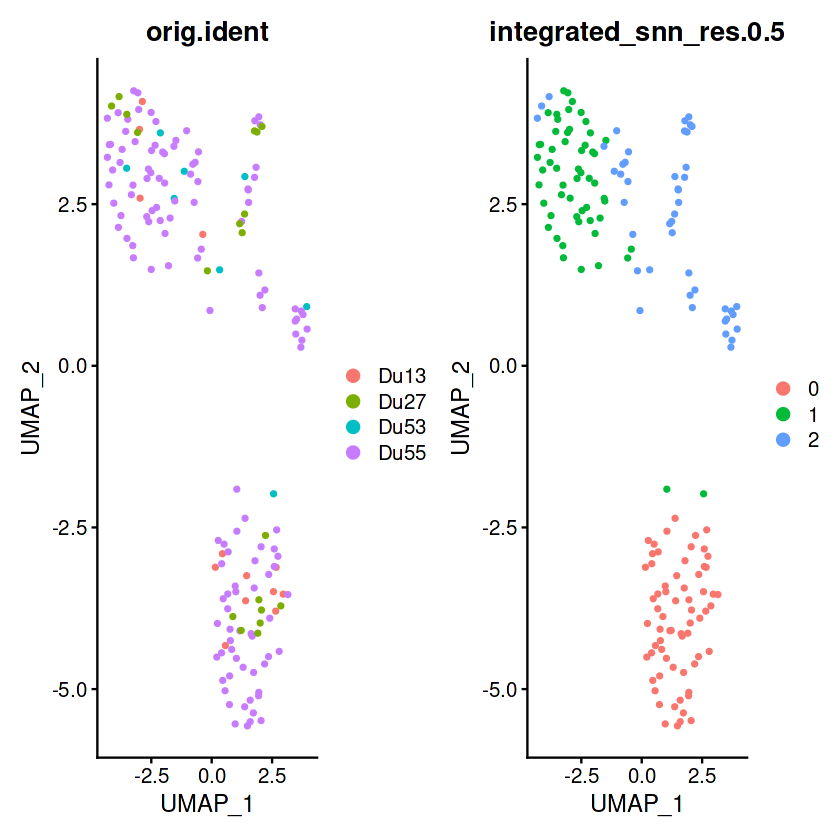

In [3]:
DimPlot(myeloid, group.by = c("orig.ident"
                             , 'integrated_snn_res.0.5'))

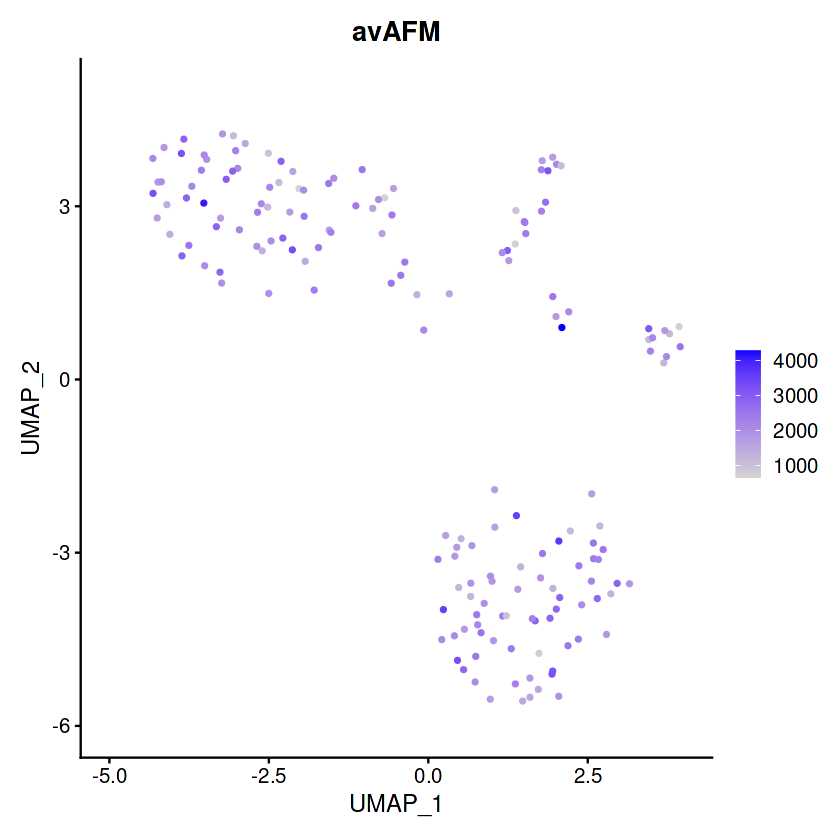

In [4]:
FeaturePlot(myeloid, c("avAFM"))

In [5]:
myeloid@meta.data$avAFM

[1] 1538.1818 2227.5731 1781.4306 2215.2709 2845.8919 2743.3283 2197.3133
  [8] 1781.4306 2143.0997 2346.8799 2436.0113 1323.8414 1792.5700 1713.8864
 [15] 1546.7882  969.3345 1641.8479 1594.5797 4097.2520  713.5150 2393.8900
 [22] 2383.5133 3550.7150 1881.1800 2496.1864 2073.2949 1644.1420 2407.9212
 [29] 1209.6015 1209.6015 4281.3267 2519.0481 2102.1508 1766.7642 3684.9033
 [36] 1209.6015 2458.3063 1676.4636 1759.4000 3550.7150 2101.8267 2148.7916
 [43] 2435.1351 1835.3457 1745.8646 2115.9868 1726.6333 2352.6672 2465.4507
 [50] 3301.4750 1989.1830 2826.6863 2917.2250 2115.9868 2277.0388 2093.8085
 [57] 2093.8085 1272.6356 1278.5400 2443.0141 1222.1429 3242.9450 2458.3063
 [64] 1671.2966 3242.9450 1942.1658 2253.7667 2380.3397 2458.3063 2465.5138
 [71] 1752.9093 1942.1658 2511.9787 2178.8698 2014.5928 2267.4552 1895.5180
 [78] 1541.7012 2277.0388 1872.4673 2159.3680 1365.3776 1954.5480 2413.7913
 [85] 2389.9734 2516.3715 1857.1296 2313.6614 2407.9212 1989.1830 3188.4517
 [92] 1835.3457 2465.5138  779.7013 2519.0481 2989.6186 1546.6589 3087.9767
 [99] 1577.4426 2776.4750 1724.0746 1244.6667 2115.9868 2462.7163 2040.7711
[106] 2471.4698 2422.5250 2043.4647 1497.1197 2595.3010 2892.6047 1995.7100
[113] 2892.6047 2040.7711 2254.0315 3244.5250 2475.7091 3244.5250 2869.6836
[120] 2469.5233 2869.6836 1630.8507 1413.2999 1890.6912  647.7900 1222.1429
[127] 2383.5133 1131.7396 2422.5250 1413.2999 2977.8933 1752.9093  647.7900
[134] 2161.4734 2006.8253 2901.1575 2011.9533 1649.0043 1852.3938 1890.6912
[141]  991.2980 1895.5180 2475.7091 2045.2783 2006.8253 1131.7396 2148.7916
[148] 1704.2309 1640.3694 1366.1274 2839.1384 2839.1384 2839.1384 1127.6900
[155] 1332.2900  696.3810 1127.6900 2752.2050 2253.3642 1250.4256 1774.3361
[162] 2109.0617 2864.7660 1848.2867 3142.6900 1035.5460 2064.5149 1986.2500

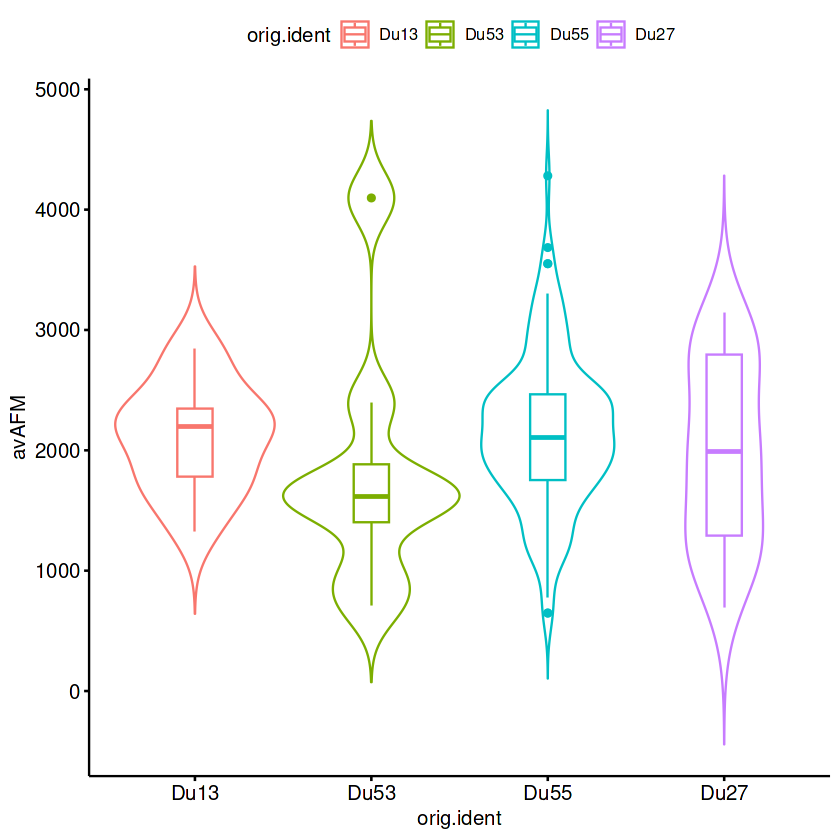

In [6]:
ggviolin(myeloid@meta.data, x = "orig.ident", y = "avAFM",
         add = "boxplot", add.params = list(fill = "white"),
         color = "orig.ident")

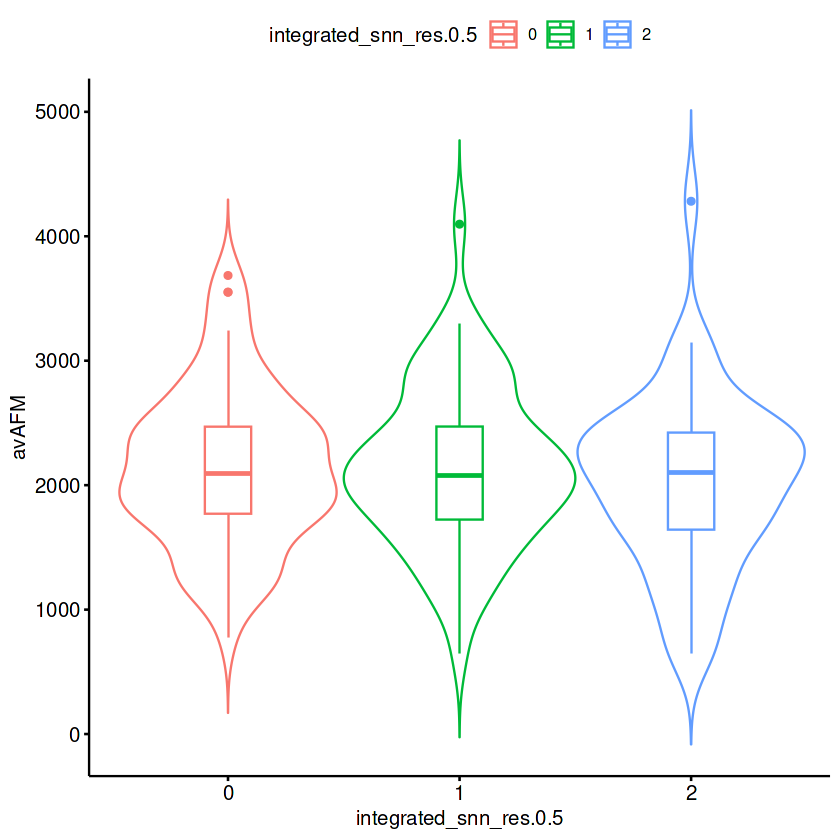

In [7]:
ggviolin(myeloid@meta.data, x = "integrated_snn_res.0.5", y = "avAFM",
         add = "boxplot", add.params = list(fill = "white"),
         color = "integrated_snn_res.0.5")

In [8]:
mye_sigs = read.csv("myeloid.signature.csv")
DefaultAssay(myeloid) <- "RNA"

for(i in 1:ncol(mye_sigs)) {      
    sigs = list(mye_sigs[[i]])

    sigs2 = sigs[[1]]
    sigs = sigs2[!is.na(sigs2)]
    print(colnames(mye_sigs[i])[1])

    myeloid <- AddModuleScore(myeloid,
                      features = list(sigs),
                      name=colnames(mye_sigs[i])[1])
}

[1] "cDC1"


Warning message:
“The following features are not present in the object: WFDC21P, SIGLEC17P, , not searching for symbol synonyms”


[1] "DC2"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Cycling.Myleoid"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "DC3"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Developing.granulocytes.neutrophils"


Warning message:
“The following features are not present in the object: DEFA1, , not searching for symbol synonyms”


[1] "Macrophage.1"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Macrophage.2"


Warning message:
“The following features are not present in the object: CD115, CD206, CD301, DECTIN1, PDL2, FIZZ1, , not searching for symbol synonyms”


[1] "Mast.cells"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Microglia"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Monocytes.MDM"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Langerhans.like.cells"


Warning message:
“The following features are not present in the object: HLA-DQB3, HLA-DRB6, HLA-DRB9, , not searching for symbol synonyms”


[1] "Myeloid.derived.suppressor.cells"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Dendritic.cells"


Warning message:
“The following features are not present in the object: C1ORF54, not searching for symbol synonyms”


[1] "Migratory.DC"


Warning message:
“The following features are not present in the object: SDAD1P1, FCGR2C, , not searching for symbol synonyms”


[1] "Transitional.DC"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "DC.precursor"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Granulocytes"


Warning message:
“The following features are not present in the object: SIGLEC17P, PAGE5, , not searching for symbol synonyms”


[1] "Neutrophils"


Warning message:
“The following features are not present in the object: AC031733.2, , not searching for symbol synonyms”


[1] "Neutrophil.myeloid.progenitor"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


[1] "Intermediate.macrophages"


Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


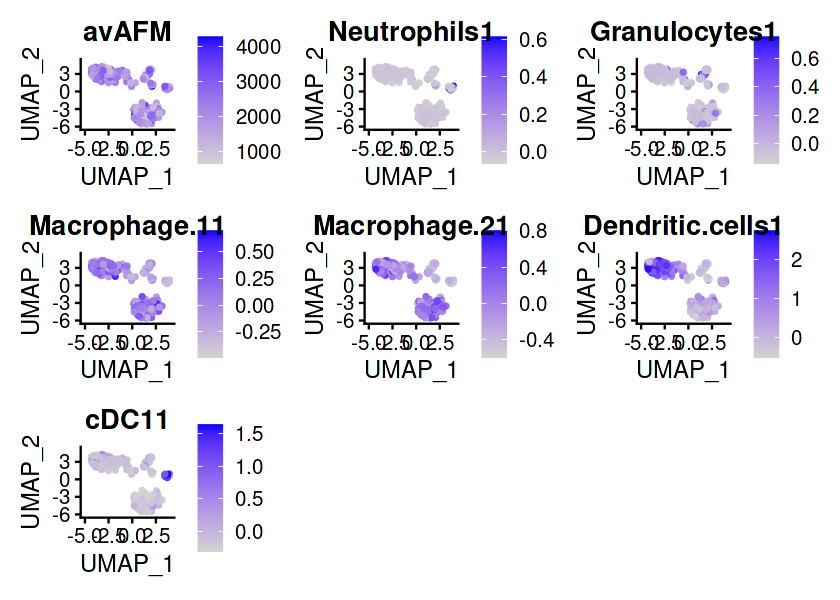

In [24]:
FeaturePlot(myeloid, c("avAFM",
                      'Neutrophils1',
                       'Granulocytes1',
                       'Macrophage.11','Macrophage.21',
                      'Dendritic.cells1','cDC11'
                      ))

In [25]:
myeloid_genes <- subset(read.csv("../NCBI_gene_result.xlsx - Cells.csv"), Cell == 'Myeloid')

In [26]:
myeloid_genes$Gene.ID

[1] "TRPV4"      "PIEZO1"     "IL1beta"    "iNOS"       "Arg1"      
 [6] "TNFbeta"    "NOS2"       "TNF-alpha"  "Arg1"       "IL10"      
[11] "CCL2"       "CCL7"       "IL6"        "IL8"        "TSG6"      
[16] "CSF1"       "CSF2"       "SCF"        "CXCL12"     "TAZ, Wwtr1"

In [27]:
myeloid@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rps,percent.rpl,percent.rp,predicted_doublets,doublet_scores,nCount_SCT,⋯,Intermediate.macrophages1,m_cell_half,myeloid_signature_half_inde1,myeloid_signature_half_inde_neg1,m_cell_quartile,myeloid_signature_quart_inde1,myeloid_signature_quart_inde_neg1,myeloid_signature_half_samp1,myeloid_signature_half_samp_neg1,myeloid_signature_quart_samp_neg1
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,⋯,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Du13_CGAGCCAAGGCAGTCA-1,Du13,2750,1529,3.2727273,1.38181818,2.254545455,3.63636364,FALSE,0.06336088,1926,⋯,-0.002282634,Low AFM,0.416558046,-0.053746266,Q1 (Low AFM),0.26399519,-0.0001145397,0.579177759,-0.324300841,-0.324300841
Du13_ACTGATGTCGACCAGC-1,Du13,1816,1195,3.5792952,0.33039648,0.165198238,0.49559471,FALSE,0.16393443,1646,⋯,-0.008360796,High AFM,-0.229564086,-0.713465366,Q3,-0.17269492,-0.3192376723,0.006897443,-0.541065315,-0.541065315
Du13_AACTCTTTCAGTCCCT-1,Du13,1450,994,7.2413793,0.34482759,0.137931034,0.48275862,FALSE,0.40959410,1414,⋯,-0.003075039,Low AFM,-0.078947160,0.585940480,Q1 (Low AFM),-0.10028123,-0.7771638139,-0.191026856,-0.042351955,-0.042351955
Du13_CCTACACAGAGGTTGC-1,Du13,1268,998,0.4731861,0.23659306,0.473186120,0.70977918,FALSE,0.33546326,1267,⋯,-0.003250783,High AFM,0.277005271,-0.570357546,Q3,0.31738575,-0.4340503547,-0.006863016,0.009696810,0.009696810
Du13_ACGATGTTCGCTGATA-1,Du13,1164,795,2.0618557,0.08591065,0.601374570,0.68728522,FALSE,0.11888112,1173,⋯,-0.003364333,High AFM,-0.055320129,-0.075878306,Q4 (High AFM),-0.11780203,-0.4496876390,0.015062948,0.044056735,0.044056735
Du13_CAGCTAAGTCTCTTTA-1,Du13,1120,791,1.6964286,0.35714286,0.000000000,0.35714286,FALSE,0.06139154,1131,⋯,-0.006831597,High AFM,-0.079163340,0.203807842,Q4 (High AFM),-0.05796995,-0.4388103312,0.032630906,-0.390829104,-0.390829104
Du13_AAGGCAGTCACATGCA-1,Du13,1094,728,10.7861060,0.09140768,0.639853748,0.73126143,FALSE,0.16393443,1130,⋯,0.000000000,Low AFM,0.223254767,-0.559713051,Q2,0.03196307,-0.6788999887,0.010126296,-0.085475003,-0.085475003
Du13_TCGCGAGAGCCATCGC-1,Du13,1042,795,0.6717850,0.09596929,0.191938580,0.28790787,FALSE,0.47325103,1061,⋯,0.000000000,Low AFM,-0.425913649,0.007300234,Q1 (Low AFM),-0.07386028,-0.1153297619,-0.117489697,0.090119908,0.090119908
Du13_ATGAGGGCACTAGTAC-1,Du13,1025,650,14.3414634,1.17073171,1.756097561,2.92682927,FALSE,0.09291339,1082,⋯,0.000000000,Low AFM,0.439307090,-0.442508343,Q2,0.09993240,-0.2229544766,0.454780809,-0.398504153,-0.398504153


converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain ch

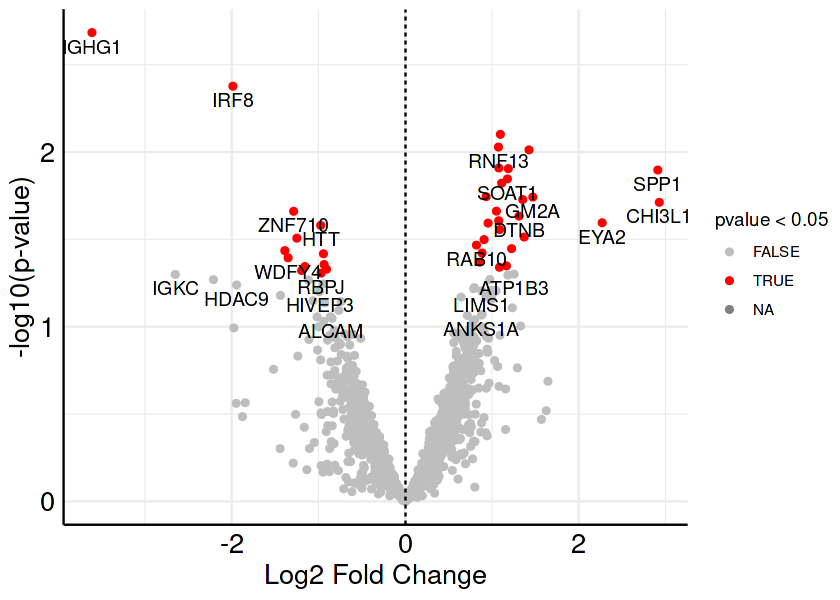

In [64]:
# Set Default Assay
DefaultAssay(myeloid) <- "RNA"

# Extract avAFM data and convert it into a vector
lcv_data <- as.vector(unlist(myeloid@meta.data$avAFM))

# Calculate quartiles and create a factor variable 'm_cell_quartile' for each sample separately
quartile_breaks <- myeloid@meta.data %>%
    group_by(orig.ident) %>%
    mutate(m_cell_quartile = cut(avAFM,
                                 breaks = quantile(avAFM, probs = c(0, 0.25, 0.50, 0.75, 1), na.rm = TRUE),
                                 include.lowest = TRUE,
                                 labels = c("Q1 (Low AFM)", "Q2", "Q3", "Q4 (High AFM)")))

# Add the quartile-based grouping back to metadata
myeloid@meta.data$m_cell_quartile <- unlist(quartile_breaks$m_cell_quartile)

# Prepare DESeqDataSet with the design including both orig.ident and m_cell_quartile
dds <- DESeqDataSetFromMatrix(countData = myeloid@assays$RNA@counts,
                              colData = myeloid@meta.data,
                              design = ~ orig.ident + m_cell_quartile)

dds_unfilt <- DESeqDataSetFromMatrix(countData = myeloid@assays$RNA@counts,
                              colData = myeloid@meta.data,
                              design = ~ orig.ident + m_cell_quartile)

# Filter out low counts
#keep <- rowSums(counts(dds) >= 5) >= 5, -0.19147503, 0.07304503
param_1 = 5
param_2 = 5


keep <- rowSums(counts(dds_unfilt) >= param_1) >= param_2
dds <- dds_unfilt[keep,]


# Filter out low counts
# keep <- rowSums(counts(dds) >= 9) >= 4, p.valie <0.05
keep <- rowSums(counts(dds) >= 5) >= 5

dds <- dds[keep,]

# Estimate size factors and run DESeq
dds <- estimateSizeFactors(dds, type='poscounts')
dds <- DESeq(dds)

# Get results for a specific quartile comparison, for example, Q4 (High AFM) vs Q1 (Low AFM)
results_data <- as.data.frame(results(dds, contrast = c("m_cell_quartile", "Q4 (High AFM)", "Q1 (Low AFM)")))

# Prepare data for plotting
results_data$gene <- rownames(results_data)
results_data$logp <- -log10(results_data$pvalue)


options(repr.plot.width = 7, repr.plot.height = 5)  # Adjust width and height as needed

# Generate volcano plot
volcano_plot <- ggplot(results_data, aes(x = log2FoldChange, y = logp)) +
    geom_point(aes(color = pvalue < 0.05)) +
    scale_color_manual(values = c("grey", "red")) +
    geom_text(data = subset(results_data, pvalue < 0.10), aes(label = gene), vjust = 1.5, hjust = 0.5, size = 4, check_overlap = TRUE) + # increased text size
    geom_vline(xintercept = 0, linetype = "dashed", color = "black") + # vertical line at x = 0
    theme_minimal() +
    theme(
        axis.title = element_text(size = 16, color = "black"),  # increased font size for axis titles
        axis.text = element_text(size = 16, color = "black"),    # increased font size for axis labels
        axis.line = element_line(color = "black")                # black axis lines
    ) +
    labs(
        x = "Log2 Fold Change",
        y = "-log10(p-value)"
    )

# Print the plot
print(volcano_plot)




Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


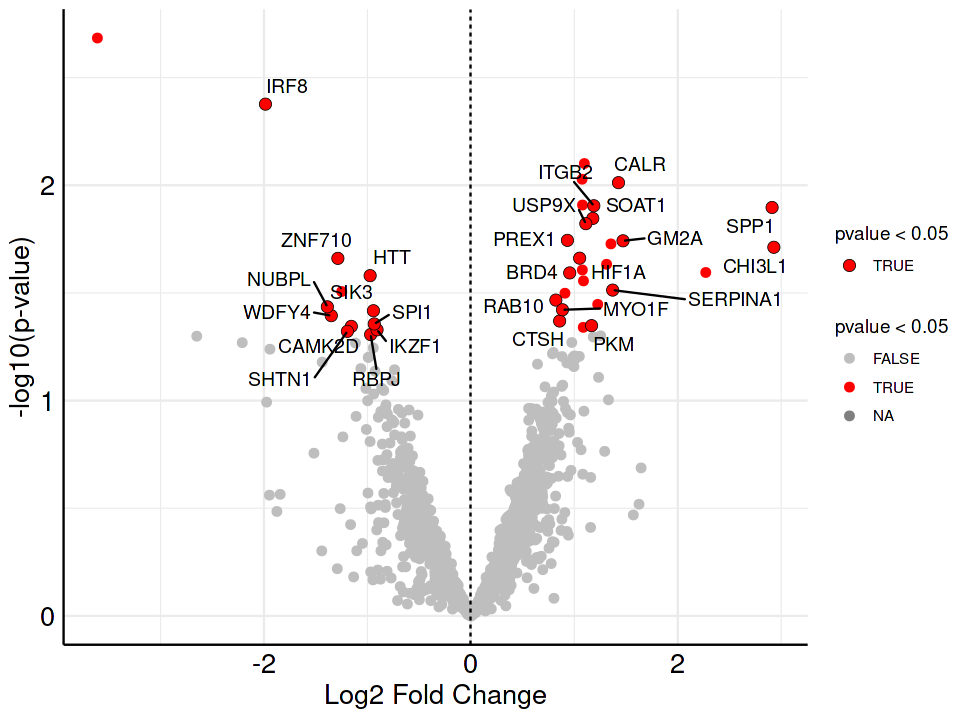

In [132]:
# Load ggrepel for better label positioning
library(ggrepel)

# List of genes to always highlight and label




highlight_genes <- c("AGR2", "AHR", 
                     "TSPAN13", "GPI","SPINT2", "H3F3A","PERP", "PITPNC1", "RICTOR", "LAMC1", "GDI2",
                     "SERPINA1", "XBP1", "C3", "PDIA3", "HLA-C", "HLA-B", "CD74", "CALR", "HLA-A", "CANX", "B2M")

highlight_genes <- c("SOAT1", "CHI3L1", "RAB10", "SPP1", "GM2A", 
                    "HIF1A", "SERPINA1", "PKM", "CTSH", 
                     "MYO1F", "CALR", "BRD4", 
                    "PREX1", "ITGB2", "USP9X", 
                    "HTT", "RBPJ", "CAMK2D", "IKZF1", "WDFY4", 
                    "SHTN1", "SPI1", "SIK3", "NUBPL", 
                    "ZNF710", "IRF8"
                    
                    )


# Adjust width and height for plot display
options(repr.plot.width = 8, repr.plot.height = 6)

# Generate volcano plot with specific genes highlighted and outlined
volcano_plot <- ggplot(results_data, aes(x = log2FoldChange, y = logp)) +
    # Default points with conditional color based on p-value
    geom_point(aes(color = pvalue < 0.05), size = 2) +
    scale_color_manual(values = c("grey", "red")) +
    # Add black outline around highlighted genes without changing color
    geom_point(data = subset(results_data, gene %in% highlight_genes), 
               shape = 21, color = "black", size = 3, stroke = 0.25, aes(fill = pvalue < 0.05)) +
    scale_fill_manual(values = c("FALSE" = "grey", "TRUE" = "red")) +
    # Label highlighted genes and significant points
    geom_text_repel(data = subset(results_data, gene %in% highlight_genes), 
                    aes(label = gene), size = 4, box.padding = 0.4, max.overlaps = Inf) +
    # Add vertical line at x = 0
    geom_vline(xintercept = 0, linetype = "dashed", color = "black") +
    theme_minimal() +
    theme(
        axis.title = element_text(size = 16, color = "black"),  # increased font size for axis titles
        axis.text = element_text(size = 16, color = "black"),   # increased font size for axis labels
        axis.line = element_line(color = "black")               # black axis lines
    ) +
    labs(
        x = "Log2 Fold Change",
        y = "-log10(p-value)"
    )

# Print the plot
print(volcano_plot)

GOI <- subset(results_data, log2FoldChange > 0)
GOI <- subset(GOI, pvalue < 0.05)
genes_f <- GOI$gene


GOI <- subset(results_data, log2FoldChange < 0)
GOI <- subset(GOI, pvalue < 0.05)
genes_r <- GOI$gene


In [135]:
# Save the volcano plot to a PDF file
pdf_file <- "volcano_plot.pdf"

# Adjust dimensions (in inches) as per your needs
ggsave(filename = pdf_file, 
       plot = volcano_plot, 
       device = "pdf", 
       width = 8, 
       height = 6)

# Confirm save location
cat("Volcano plot saved to", pdf_file, "\n")


Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


Volcano plot saved to volcano_plot.pdf 


Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


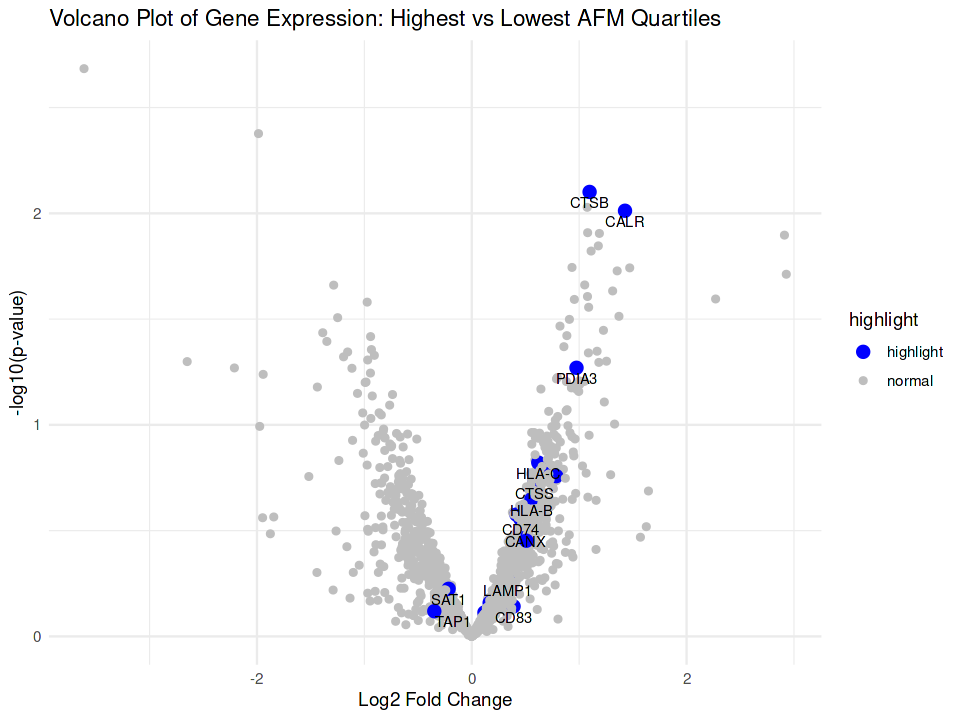

In [80]:
# Assuming you have a dataframe `expr_data` containing gene expression data
# and a column in your metadata for the grouping (e.g., "m_cell_quartile")
# Genes related to antigen presentation
antigen_presentation_genes <- c("HLA-A", "HLA-B", "HLA-C", "TAP1", "TAP2", "CIITA", "PSMB8", "PSMB9", "CD74", 
                                "HLA-E", "HLA-G", "HLA-F", "CD1A", "CD1B", "CD1C", "CD1D", "CD1E",
                                "LAMP1", "LAMP2", "CTSS", "CTSB", "CTSD", "CD40", "CD83", "CD209")

# Extended list of genes related to MHC Class I (MHCI) pathway
mhcI_genes <- c("HLA-A", "HLA-B", "HLA-C", "B2M", "TAP1", "TAP2", "TAPBP", "PSMB8", "PSMB9", 
                "ERAP1", "ERAP2", "LMP2", "LMP7", "HLA-E", "HLA-F", "HLA-G", 
                "SEC61A1", "CALR", "CANX", "PDIA3", "UBQLN1", "UBQLN2", "XBP1", "SAT1")



# List of specific genes to highlight
highlight_genes <- c(antigen_presentation_genes,mhcI_genes) # replace or add more genes as needed

# Flag genes in the results data to identify those for highlighting
results_data$highlight <- ifelse(results_data$gene %in% highlight_genes, "highlight", "normal")

# Create updated volcano plot with labeled and highlighted genes
volcano_plot <- ggplot(results_data, aes(x = log2FoldChange, y = -log10(pvalue))) +
    geom_point(aes(color = highlight, size = highlight)) +
    scale_color_manual(values = c("normal" = "grey", "highlight" = "blue")) + # "blue" for highlighted genes
    scale_size_manual(values = c("normal" = 1.5, "highlight" = 3)) + # Increase size for highlighted genes
    geom_text(data = subset(results_data, highlight == "highlight"), 
              aes(label = gene), vjust = 1.5, hjust = 0.5, size = 3, check_overlap = TRUE) +
    theme_minimal() +
    labs(title = "Volcano Plot of Gene Expression: Highest vs Lowest AFM Quartiles", 
         x = "Log2 Fold Change", 
         y = "-log10(p-value)")

# Print the updated plot
print(volcano_plot)



In [124]:
# Group 1/2 TAMs: Growth, Survival, Structural Remodeling, and Nutrient Support

# Group 3/4 TAMs: Immune Response, Stress Adaptation, and Hypoxia Management

group_2_tams = c(
  "Positive Regulation Of Cytokine Production (GO:0001819)",
  "Response To Interleukin-1 (GO:0070555)",
  "Positive Regulation Of Wnt Signaling Pathway (GO:0030177)",
  "Positive Regulation Of Hydrolase Activity (GO:0051345)",
  "Positive Regulation Of Signal Transduction (GO:0009967)",
  "Positive Regulation Of Vasculature Development (GO:1904018)",


  "Regulation Of Focal Adhesion Assembly (GO:0051893)",
  "Positive Regulation Of I-kappaB kinase/NF-kappaB Signaling (GO:0043123)"


)

group_4_tams = c(
  "Mononuclear Cell Differentiation (GO:1903131)",
  "Myeloid Cell Differentiation (GO:0030099)",
  "Positive Regulation Of Myeloid Leukocyte Mediated Immunity (GO:0002888)",
  "Defense Response To Tumor Cell (GO:0002357)",
  "Positive Regulation Of Innate Immune Response (GO:0045089)",
  "T Cell Differentiation (GO:0030217)",
  "Regulation Of Type I Interferon Production (GO:0032479)",
  "Negative Regulation Of NF-kappaB Transcription Factor Activity (GO:0032088)"


)

all_pathways = c(group_2_tams,group_4_tams)
all_pathways

tmut_enr_total <- (mut_enr_total[mut_enr_total$Term %in% all_pathways,])
rownames(tmut_enr_total) <- tmut_enr_total$Term
tmut_enr_total <- tmut_enr_total[all_pathways,]
temp <- tmut_enr_total[,c('Adjusted.P.value','Odds.Ratio', 'Combined.Score', 'qscore')]
tmut_enr_total <- tmut_enr_total[,c()]
tmut_enr_total$p.val.pos <- temp$Adjusted.P.value
tmut_enr_total$q.score.pos <- temp$qscore
rownames(tmut_enr_total) <- all_pathways
tmut_enr_total$p.val.pos <- ifelse(is.na(tmut_enr_total$p.val.pos), 1, tmut_enr_total$p.val.pos)
tmut_enr_total$q.score.pos <- ifelse(is.na(tmut_enr_total$q.score.pos), 0, tmut_enr_total$q.score.pos)

tmut_enr_total_neg <- (mut_enr_total_neg[mut_enr_total_neg$Term %in% all_pathways,])
rownames(tmut_enr_total_neg) <- tmut_enr_total_neg$Term
tmut_enr_total_neg <- tmut_enr_total_neg[all_pathways,]
temp <- tmut_enr_total_neg[,c('Adjusted.P.value','Odds.Ratio', 'Combined.Score', 'qscore')]
tmut_enr_total_neg <- tmut_enr_total_neg[,c()]
tmut_enr_total_neg$p.val.neg <- temp$Adjusted.P.value
tmut_enr_total_neg$q.score.neg <- temp$qscore
rownames(tmut_enr_total_neg) <- all_pathways
# Fill p-values and q-scores with NA handling
tmut_enr_total_neg$p.val.neg <- ifelse(is.na(tmut_enr_total_neg$p.val.neg), 1, tmut_enr_total_neg$p.val.neg)
tmut_enr_total_neg$q.score.neg <- ifelse(is.na(tmut_enr_total_neg$q.score.neg), 0, tmut_enr_total_neg$q.score.neg)

tmut_enr_total_neg


tmut_enr_total_neg$q.score.neg <- rescale(tmut_enr_total_neg$q.score.neg, to=c(0,1))
tmut_enr_total$p.val.neg <- rescale(tmut_enr_total$p.val.neg, to=c(0,1))



[1] "Positive Regulation Of Cytokine Production (GO:0001819)"                    
 [2] "Response To Interleukin-1 (GO:0070555)"                                     
 [3] "Positive Regulation Of Wnt Signaling Pathway (GO:0030177)"                  
 [4] "Positive Regulation Of Hydrolase Activity (GO:0051345)"                     
 [5] "Positive Regulation Of Signal Transduction (GO:0009967)"                    
 [6] "Positive Regulation Of Vasculature Development (GO:1904018)"                
 [7] "Regulation Of Focal Adhesion Assembly (GO:0051893)"                         
 [8] "Positive Regulation Of I-kappaB kinase/NF-kappaB Signaling (GO:0043123)"    
 [9] "Mononuclear Cell Differentiation (GO:1903131)"                              
[10] "Myeloid Cell Differentiation (GO:0030099)"                                  
[11] "Positive Regulation Of Myeloid Leukocyte Mediated Immunity (GO:0002888)"    
[12] "Defense Response To Tumor Cell (GO:0002357)"                                
[13] "Positive Regulation Of Innate Immune Response (GO:0045089)"                 
[14] "T Cell Differentiation (GO:0030217)"                                        
[15] "Regulation Of Type I Interferon Production (GO:0032479)"                    
[16] "Negative Regulation Of NF-kappaB Transcription Factor Activity (GO:0032088)"

,p.val.neg,q.score.neg
,<dbl>,<dbl>
Positive Regulation Of Cytokine Production (GO:0001819),0.11396589,0.9432251
Response To Interleukin-1 (GO:0070555),1.00000000,0.0000000
Positive Regulation Of Wnt Signaling Pathway (GO:0030177),1.00000000,0.0000000
Positive Regulation Of Hydrolase Activity (GO:0051345),1.00000000,0.0000000
Positive Regulation Of Signal Transduction (GO:0009967),0.09654881,1.0152531
Positive Regulation Of Vasculature Development (GO:1904018),1.00000000,0.0000000
Regulation Of Focal Adhesion Assembly (GO:0051893),1.00000000,0.0000000
Positive Regulation Of I-kappaB kinase/NF-kappaB Signaling (GO:0043123),1.00000000,0.0000000
Mononuclear Cell Differentiation (GO:1903131),0.03845174,1.4150840


In [125]:
tmut_enr_total

,p.val.pos,q.score.pos
,<dbl>,<dbl>
Positive Regulation Of Cytokine Production (GO:0001819),0.031345430,1.5038258
Response To Interleukin-1 (GO:0070555),0.118986633,0.9245018
Positive Regulation Of Wnt Signaling Pathway (GO:0030177),0.266308897,0.5746143
Positive Regulation Of Hydrolase Activity (GO:0051345),0.111980688,0.9508569
Positive Regulation Of Signal Transduction (GO:0009967),0.019447508,1.7111360
Positive Regulation Of Vasculature Development (GO:1904018),0.007918648,2.1013490
Regulation Of Focal Adhesion Assembly (GO:0051893),0.107242335,0.9696337
Positive Regulation Of I-kappaB kinase/NF-kappaB Signaling (GO:0043123),0.111980688,0.9508569
Mononuclear Cell Differentiation (GO:1903131),0.134281475,0.8719839


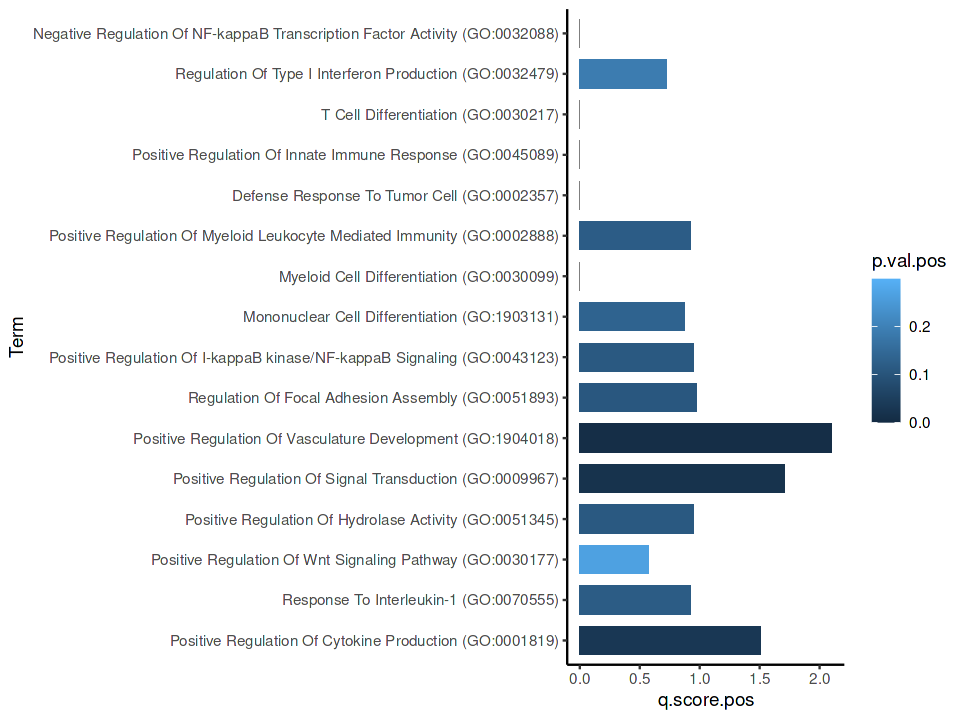

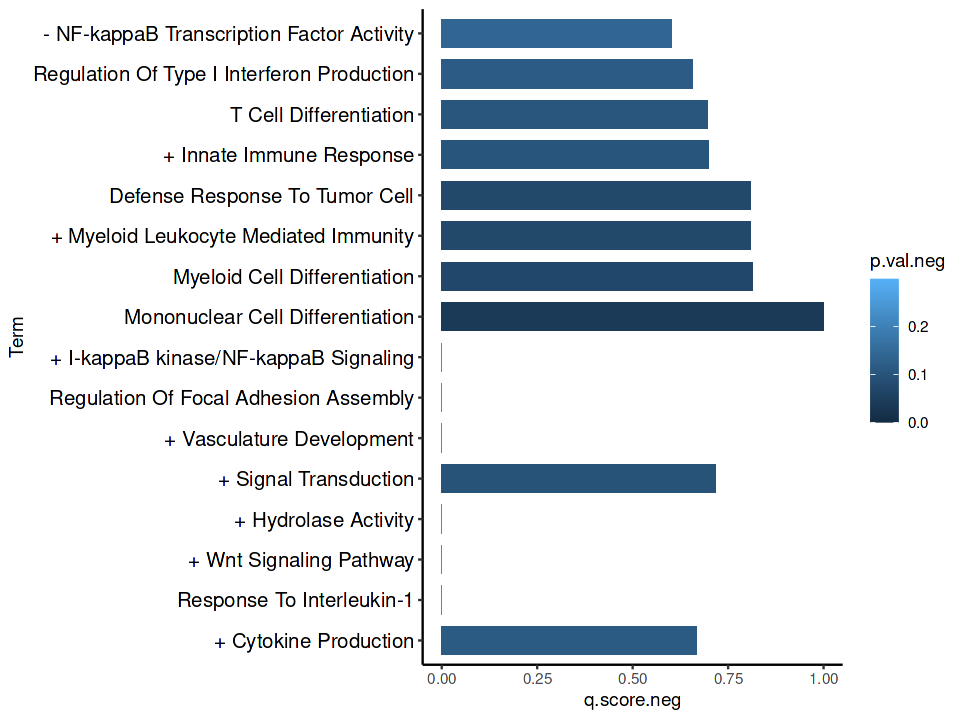

In [126]:
tmut_enr_total$Term <- rownames(tmut_enr_total)
tmut_enr_total$Term <- factor(tmut_enr_total$Term, levels = tmut_enr_total$Term)

ggplot(tmut_enr_total, aes(x = Term , y =  q.score.pos, 
                                  fill=p.val.pos)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip() +
scale_fill_gradient( limits = c(0, 0.3)) +
theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "black"))

tmut_enr_total_neg$Term <- rownames(tmut_enr_total_neg)

tmut_enr_total_neg$Term <- gsub(" \\(GO:.*$", "", rownames(tmut_enr_total_neg))
tmut_enr_total_neg$Term <- gsub("positive regulation of ", "+ ", tmut_enr_total_neg$Term, ignore.case = TRUE)
tmut_enr_total_neg$Term <- gsub("negative regulation of ", "- ", tmut_enr_total_neg$Term, ignore.case = TRUE)

tmut_enr_total_neg$Term <- factor(tmut_enr_total_neg$Term, levels = tmut_enr_total_neg$Term)


tmut_enr_total_neg$Term <- factor(tmut_enr_total_neg$Term, levels = tmut_enr_total_neg$Term)

ggplot(tmut_enr_total_neg, aes(x = Term , y =  q.score.neg, 
                                  fill=p.val.neg)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip() +
      scale_fill_gradient( limits = c(0, 0.3)) +
  theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "black"),
           axis.text.y = element_text(size = 12, color = "black") # Increase font size for y-axis tick labels
)



In [128]:
pdf("pairwisecomparisions_plots.pdf", width = 8, height = 6)  # Adjust width and height as needed


tmut_enr_total$Term <- rownames(tmut_enr_total)
tmut_enr_total$Term <- factor(tmut_enr_total$Term, levels = tmut_enr_total$Term)

ggplot(tmut_enr_total, aes(x = Term , y =  q.score.pos, 
                                  fill=p.val.pos)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip() +  theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "black"))

tmut_enr_total_neg$Term <- rownames(tmut_enr_total_neg)

tmut_enr_total_neg$Term <- gsub(" \\(GO:.*$", "", rownames(tmut_enr_total_neg))
tmut_enr_total_neg$Term <- gsub("positive regulation of ", "+ ", tmut_enr_total_neg$Term, ignore.case = TRUE)
tmut_enr_total_neg$Term <- gsub("negative regulation of ", "- ", tmut_enr_total_neg$Term, ignore.case = TRUE)

tmut_enr_total_neg$Term <- factor(tmut_enr_total_neg$Term, levels = tmut_enr_total_neg$Term)


tmut_enr_total_neg$Term <- factor(tmut_enr_total_neg$Term, levels = tmut_enr_total_neg$Term)

ggplot(tmut_enr_total_neg, aes(x = Term , y =  q.score.neg, 
                                  fill=p.val.neg)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip() +
  theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "black"),
           axis.text.y = element_text(size = 12, color = "black") # Increase font size for y-axis tick labels
)
dev.off()


png 
  2